In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [8]:
data = pd.read_csv('/content/Melbourne_housing_FULL.csv')
print(data.head())

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             R

In [16]:
# Check for missing data and print the count of missing values in each column
#instead of just eleteing the missing data, I'm using calculations to fill it in
missing_data = data.isnull().sum()

# Display columns with missing values and their respective counts
columns_with_missing_data = missing_data[missing_data > 0]
print("Columns with missing data:")
print(columns_with_missing_data)

# Total count of missing values in the entire DataFrame
total_missing = missing_data.sum()
print(f"\nTotal missing values in the DataFrame: {total_missing}")


Columns with missing data:
Price             7610
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Total missing values in the DataFrame: 100975


In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Step 1: Load the dataset
data = pd.read_csv('/content/Melbourne_housing_FULL.csv')

# Step 2: Define columns with missing data
columns_with_missing_data = ['Price', 'Rooms', 'BuildingArea', 'Bedroom2', 'Distance']

# Step 3: Impute missing data
for column in columns_with_missing_data:
    if column == 'Price':
        # Calculate the median 'Price' and fill missing values with it
        median_price = data['Price'].median()
        data['Price'].fillna(median_price, inplace=True)
    else:
        # For other columns, use the mean value to fill missing data
        imputer = SimpleImputer(strategy='mean')
        data[column] = imputer.fit_transform(data[[column]])

# Step 4: Verify that there are no missing values left
missing_data = data.isnull().sum()
print("Columns with missing data:")
print(missing_data[missing_data > 0])


Columns with missing data:
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


Mean Squared Error (MSE): 36650084214676.45
R-squared (R2) Score: -122.74181467332728


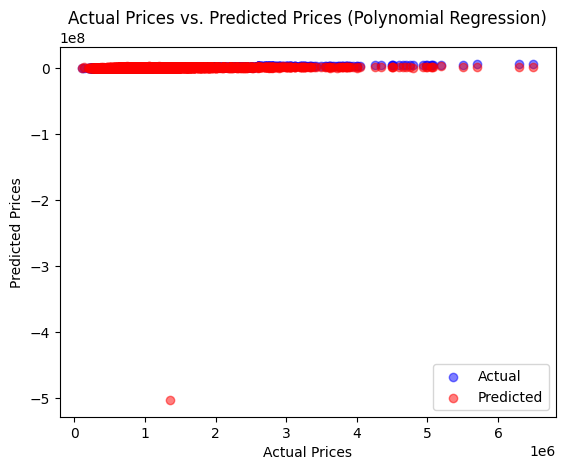

In [20]:
# Using 'Rooms', 'BuildingArea', 'Bedroom2', and 'Distance' as features
X = data[['Rooms', 'BuildingArea', 'Bedroom2', 'Distance']]
y = data['Price']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Handle Missing Values in Features
# Create an imputer and fit-transform X_train
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 4: Handle Missing Values in the Target Variable
# Create an imputer for y and fit-transform y_train
y_imputer = SimpleImputer(strategy='mean')
y_train = y_imputer.fit_transform(y_train.values.reshape(-1, 1))
y_test = y_imputer.transform(y_test.values.reshape(-1, 1))

# Flatten the y arrays back to 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

# Step 5: Create Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 6: Create and train the Polynomial Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

# Visualization (Optional)
plt.scatter(y_test, y_test, label="Actual", color='blue', alpha=0.5)  # Actual values in blue
plt.scatter(y_test, y_pred, label="Predicted", color='red', alpha=0.5)  # Predicted values in red

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices (Polynomial Regression)")
plt.legend()
plt.show()


In [21]:
# Find indices where predicted values do not match actual values
mismatched_indices = [i for i in range(len(y_test)) if y_pred[i] != y_test[i]]

# Create a DataFrame with mismatched predictions and actual values
mismatched_df = pd.DataFrame({'Actual': y_test[mismatched_indices], 'Predicted': y_pred[mismatched_indices]})

# Print the DataFrame with mismatched predictions
print("Mismatched Predictions:")
print(mismatched_df)


Mismatched Predictions:
            Actual     Predicted
0     9.550000e+05  1.223973e+06
1     4.110000e+05  4.262976e+05
2     8.750000e+05  8.767169e+05
3     7.460000e+05  9.819163e+05
4     1.250000e+06  1.221255e+06
...            ...           ...
6967  1.055510e+06  1.652913e+06
6968  7.000000e+05  8.256257e+05
6969  1.748000e+06  1.553124e+06
6970  1.075000e+06  1.512034e+06
6971  9.000000e+05  1.124627e+06

[6972 rows x 2 columns]


1. **Actual**: These are the actual house prices for the corresponding instances in your test dataset. These values represent the ground truth, i.e., the real prices of the houses.

2. **Predicted**: These are the prices predicted by your Polynomial Regression model for the same instances in the test dataset.

3. **Mismatched Predictions**: These are the instances where the predicted prices do not match the actual prices. In other words, these are the cases where your model's predictions had errors.

Here's how to interpret a row in this output:
- For example, in the first row, the actual price of a house was approximately 955,000 USD, but your model predicted it to be approximately 1,223,973 USD. This is an example of a mismatched prediction, where the model overestimated the price.

Mismatched predictions are common

To further analyze and potentially improve your model, consider:

- Feature engineering: Adding or transforming features that might improve prediction accuracy.
- Model selection: Experimenting with different regression models (e.g., Ridge, Lasso, Elastic Net) or even non-linear models to see if they perform better.
- Hyperparameter tuning: Adjusting hyperparameters of your model, such as the degree of polynomial features in your case.
- Collecting more data: More data can often lead to more accurate predictions.
- Outlier handling: Identifying and handling outliers in your data, which can have a significant impact on predictions.

